### Standardize data for training/validation/testing

In [1]:
import glob
import os, shutil
import matplotlib.pyplot as plt
import numpy as np

* Standarizing **training** data:

In [2]:
path_tr = 'eVSmuVSa_LocTrain/'

files_tr = os.listdir(path_tr)

In [3]:
len(files_tr) #total number of batches

171

In [4]:
m_data = []
m_loc = []
std_data = []
std_loc = []

for index, file in enumerate(files_tr):  
    
    data = np.load(os.path.join(path_tr, files_tr[index]))['X']
    label = np.load(os.path.join(path_tr, files_tr[index]))['y']
    loc_a = np.load(os.path.join(path_tr, files_tr[index]))['loc']
    
    m_data.append(data.mean())
    m_loc.append(loc_a.mean())
    
    std_data.append(data.std())
    std_loc.append(loc_a.std())

In [5]:
#total mean and standard deviation of the train
m_train = np.mean(m_data)
m_loc = np.mean(m_loc)

std_train = np.mean(std_data)
std_loc = np.mean(std_loc)

In [6]:
print("Mean and std for the data:", m_train, std_train)

Mean and std for the data: 7.500775046341478 512.9664806227514


In [7]:
print("Mean and std for the location:", m_loc, std_loc)

Mean and std for the location: 57.007903874269005 64.09855334908328


In [8]:
#'index' is the number of the file, and 'file' is the name of the file
for index, file in enumerate(files_tr):  
    
    #loading each image as a numpy array
    data = np.load(os.path.join(path_tr, files_tr[index]))['X']
    label = np.load(os.path.join(path_tr, files_tr[index]))['y']
    loc_a = np.load(os.path.join(path_tr, files_tr[index]))['loc']
    
    data = (data - m_train) / std_train
    data = data.reshape((data.shape[0], data.shape[1], data.shape[2], 1))
    
    loc_a = (loc_a - m_loc) / std_loc
    
    label = np.concatenate((label, loc_a), axis=1)

    np.savez(os.path.join(path_tr, file), X=data, y=label)

batch6.npz


Text(0.5, 1.0, 'Energy')

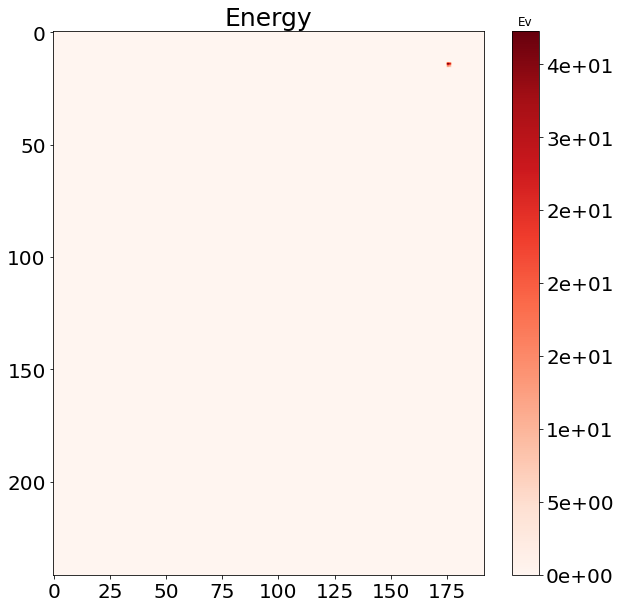

In [9]:
original_dataset_dir = path_tr

files = files_tr
f=34
e = np.load(os.path.join(original_dataset_dir, files[f]))['X']
print(files[f])
e = e.reshape((e.shape[0], e.shape[1], e.shape[2]))[60]

fig_e = plt.figure(figsize=(10,10))
plt.imshow(e, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Energy", fontsize = 25)

In [10]:
e.std()

0.23433388416444284

In [11]:
e.mean()

-0.012636701109237057

In [12]:
np.load(os.path.join(original_dataset_dir, files[f]))['y'][60]

array([ 0.        ,  1.        ,  0.        ,  1.8251909 , -0.68656626,
       -0.85817699, -0.85817699])

* Standarizing **test** data:

In [13]:
path_te = 'eVSmuVSa_LocTest/'

files_te = os.listdir(path_te)

In [14]:
len(files_te)

58

In [ ]:
#'index' is the number of the file, and 'file' is the name of the file
for index, file in enumerate(files_te):  
    
    #loading each image as a numpy array
    data = np.load(os.path.join(path_te, files_te[index]))['X']
    label = np.load(os.path.join(path_te, files_te[index]))['y']
    loc_a = np.load(os.path.join(path_te, files_te[index]))['loc']
    
    data = (data - m_train) / std_train
    data = data.reshape((data.shape[0], data.shape[1], data.shape[2], 1))
    
    loc_a = (loc_a - m_loc) / std_loc
    
    label = np.concatenate((label, loc_a), axis=1)

    np.savez(os.path.join(path_te, file), X=data, y=label)

* Standarizing **validation** data:

In [32]:
path_v = 'eVSmuVSa_LocVal/'

files_v = os.listdir(path_v)

In [33]:
len(files_v)

56

In [34]:
for index, file in enumerate(files_v):  
    
    #loading each image as a numpy array
    data = np.load(os.path.join(path_v, files_v[index]))['X']
    label = np.load(os.path.join(path_v, files_v[index]))['y']
    loc_a = np.load(os.path.join(path_v, files_v[index]))['loc']
    
    data = (data - m_train) / std_train
    data = data.reshape((data.shape[0], data.shape[1], data.shape[2], 1))
    
    loc_a = (loc_a - m_loc) / std_loc
    
    label = np.concatenate((label, loc_a), axis=1)

    np.savez(os.path.join(path_v, file), X=data, y=label)